# **Basics of dataframe**

Dataframe is a datastructure used to store data in the form of a table that contains of rows and columns,which will be useful in handling structured data. Python has an library called as Pyspark which will be helpful in doing spark related operations.

In this section of the notebook, let's see how to:

> Import pyspark and creating spark session


> Reading a csv and json file using pyspark


> Viewing,inferring, typecasting schema of the dataframe











## **Import pyspark**


If you have installed pyspark correctly as per the recommended procedures then the below code cell will run without any issues, or if you have any issues while executing then checkout the reference links of this repository

In [1]:
#Importing pyspark
import pyspark

### Creating a spark session
1. Inorder to execute spark commands we need to initialize a spark session with an app name
2. This will helps to perform the spark related activities on the local machine.
3. For databricks you might don't need to execute this command as databricks itself will create a spark session for you.

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

The above cell will take some amount of time while your'e executing it for the very first time.

In [3]:
#Checking the created spark session object
spark

## **Reading Dataframe using pyspark**

Pyspark offers variety of options to read data from different kinds of files like as you see in the below screenshot.

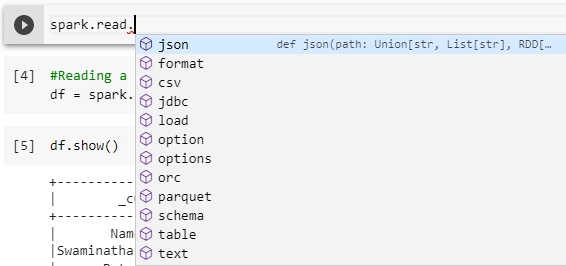

Here we are going to see how to load a csv file as a dataframe using pyspark

In [4]:
#Reading a csv file using spark
df = spark.read.csv("Data1.csv")

## **Viewing, Inferring and typecasting schema of a spark dataframe**

### Viewing the dataframe

In [5]:
#Inorder to view the loaded csv file let's see what is the type of the "df" variable.
df

DataFrame[_c0: string, _c1: string]

In [6]:
#Though it's of a spark dataframe type, use .show() to view the loaded dataframe
#This .show() will be very useful in displaying the spark dataframe.
df.show()

+-----------+----+
|        _c0| _c1|
+-----------+----+
|       Name| Age|
|Swaminathan|  24|
|      Peter|null|
|        Sam|  54|
|      Henry|null|
+-----------+----+



You could see in the above code cell, the column names were different, that was because we haven't mentioned that the first row of the dataframe will be the header(column name) of the dataframe while loading.

In [7]:
#Reading the same data, with header = True.
df=spark.read.csv("Data1.csv", header=True)

In [8]:
df.show()

+-----------+----+
|       Name| Age|
+-----------+----+
|Swaminathan|  24|
|      Peter|null|
|        Sam|  54|
|      Henry|null|
+-----------+----+



### Printing schema of the dataframe

Schema will gives the information of each columns within the dataset.

In [9]:
# printSchema() will gives the schema of the loaded dataframe.
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)



The column type "Age" is mentioned as String, this is because we haven't inferred the schema of the csv file while we are loading it.

Note: pyspark.read.csv() has a functionality known as inferschema that will helps in indentifying the datatype of the column. This method is available only for csv files.

In [10]:
#Reading the same data, with header and inferschema = True.
df=spark.read.csv("Data1.csv", header=True, inferSchema=True)

In [11]:
#Viewing the newly loaded dataframe.
df.show()

+-----------+----+
|       Name| Age|
+-----------+----+
|Swaminathan|  24|
|      Peter|null|
|        Sam|  54|
|      Henry|null|
+-----------+----+



In [12]:
#Printing the schema of the newly loaded csv dataframe
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)



In [13]:
#Gives out the columns present in the dataframe.
df.columns

['Name', 'Age']

In [14]:
#gives out the statistical analysis of datapoints as per the columns in the dataframe.
df.describe().show()

+-------+-----------+------------------+
|summary|       Name|               Age|
+-------+-----------+------------------+
|  count|          4|                 2|
|   mean|       null|              39.0|
| stddev|       null|21.213203435596427|
|    min|      Henry|                24|
|    max|Swaminathan|                54|
+-------+-----------+------------------+



In [15]:
#Loading a json file using pyspark
#Since the json is multiline, the multiline parameter is set as True.
df_json=spark.read.json("Data1.json", multiLine=True)

In [16]:
#Viewing the json dataframe.
df_json.show()

+---+-----------+
|Age|       Name|
+---+-----------+
| 24|Swaminathan|
| 32|      Peter|
| 54|        Sam|
| 12|      Henry|
+---+-----------+



In [17]:
#Prints the schema of the json file.
df_json.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Name: string (nullable = true)



Notice that the "Age" column belongs to long datatype, whereas it should be a integer.For this we need to typecast the columns of the json file using StructType and StructField that is available in pyspark.

### Typecasting of columns in a dataframe

Typecasting is the process of changing one variable datatype into another, here we are changing the type of spark dataframe columns

In [18]:
#Importing Types and fields from pyspark types
from pyspark.sql.types import StructType,StructField,IntegerType,StringType

In [19]:
#Defining the Field names along with it's datatypes.
json_schema = [StructField("Name", StringType(),True),
               StructField("Age", IntegerType(),True)]
json_fields = StructType(json_schema)

In [20]:
#Reloading the same json with typecasting of columns
df_json = spark.read.json("Data1.json",schema=json_fields,multiLine=True)

In [21]:
#Displaying the reloaded json.
df_json.show()

+-----------+---+
|       Name|Age|
+-----------+---+
|Swaminathan| 24|
|      Peter| 32|
|        Sam| 54|
|      Henry| 12|
+-----------+---+



In [22]:
#Printing the schema of the reloaded json file.
df_json.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)



Now you can see the column type of age was changed to integer.